# Task 1 : Pridiction Using Supervised ML

##### In this task we have to pridict the percentage score of a student based on the number of hours studied.The task has two variables where the feature is the number of hours studied and the target value is the percentage score . This can be solved using simple linear regression

#### Author : SAGAR MEENA

In [12]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from remote URL

In [27]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [29]:
# now let's observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [32]:
# to find the number of columns and raws
df.shape

(25, 2)

In [33]:
# let's find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [35]:
# now we will check if our dataset contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## STEP 2 - Visualizing the dataset


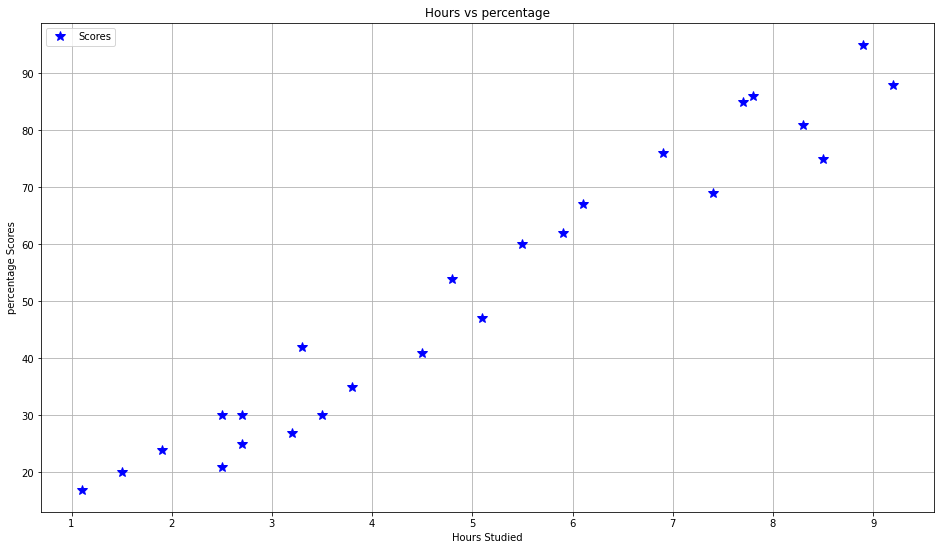

In [37]:
# plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x = 'Hours' , y = 'Scores' , style = '*' , color = 'blue' , markersize = 10)
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Scores')
plt.grid()
plt.show()

In [38]:
# we can also use .corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## step 3 - Data preparation 

In [39]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
# using iloc function we will divide the data
x = df.iloc[:,:1].values
y = df.iloc[: ,1:].values

In [44]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [45]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [46]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size = 0.2 , random_state = 0)

## STEP  4 - Training the Algorithm

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

# STEP 5 - Visualizing the model

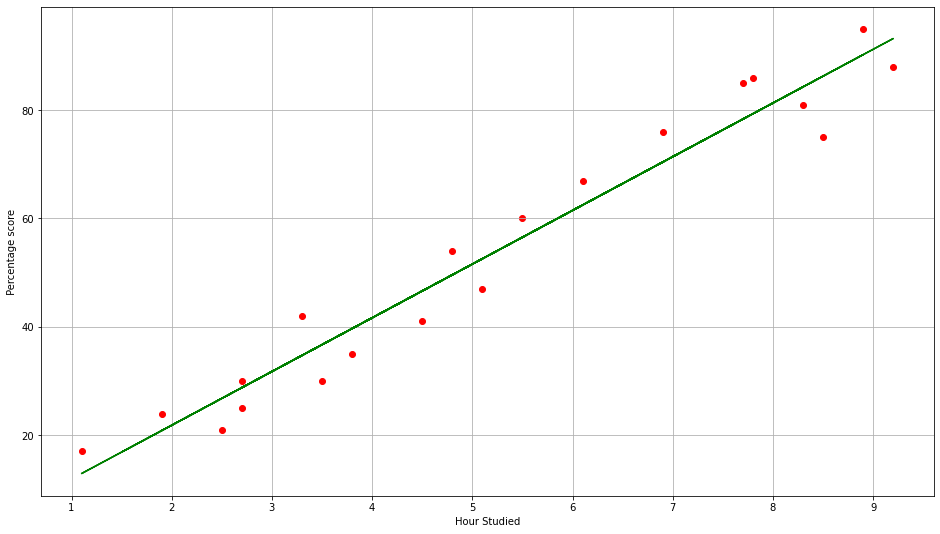

In [51]:
line = model.coef_*x + model.intercept_

# Plotting for the training Data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter( x_train , y_train , color = 'red')
plt.plot(x ,line , color = 'green')
plt.xlabel('Hour Studied')
plt.ylabel(' Percentage score ')
plt.grid()
plt.show()


# step 6 - Making predictions


In [52]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [54]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [55]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [57]:
# comparing Actual vs predicted
comp = pd.DataFrame({'Actual' : [y_test] , 'Predicted': [y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


## STEP 7- Evaluating the model

In [59]:
from sklearn import metrics

print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test ,y_pred))

Mean Absolute Error: 4.183859899002975
